<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 4
## 23-05-2023
#### Autor: Yañez $\lambda$, Joaquin

En esta tarea semanal se nos pedía el diseño de un filtro pasa altos de máxima planicidad, partiendo de la siguiente plantilla:

<img src="./Fotos/Consigna.png"/> 

A simple vista se observa que no será del tipo Butterworth ya que en la frecuencia de paso la atenuación pedida no es de $3dB$. A continuación se muestra el desarrollo de las consignas

In [2]:
from IPython.display import IFrame
IFrame("./TS4.pdf", width=800, height=800)

### Norma de frecuencia

Se observa como las respuestas en frecuencia del filtro pedido es claramente la inversa del filtro prototipo (Como es de esperar debido a la naturaleza del núcleo de transformación pedido). A la hora de resolver el problema es importante recalcar que para simplificar los valores de las transferencias se utilizo un filtro del tipo butterwoth y el $\epsilon$ se incluyó dentro de la norma de frecuencia, por lo que se debe esperar una atenuación de $3dB$ en la frecuencia de paso $\omega_p = 1$. Esta simplificación también afecta a la norma de frecuencia la cual termina siendo para el filtro prototipo:

\begin{equation}
\Omega_{\Omega} =\frac{\epsilon^{-1/n}}{2\pi f_{p} }
\end{equation}

Luego de volver a aplicar el núcleo de transformación para conseguir el filtro pedido la norma de frecuencia también se ve afectada nuevamente resultando ser:

\begin{equation}
\Omega_{\omega} =2\pi f_{p} \epsilon^{1/n}
\end{equation}

### Armado del circuito pasivo

Para poder conseguir la transferencia de tercer orden con elementos pasivos principalmente lo que se realizó fue un circuito RLC para poder conseguir los dos polos complejos conjugados y luego utilizando un OPAMP como buffer para no cargar las etapas con un circuito RC se consiguió el polo simple real, como todos los polos se encuentran en el mismo radio (Filtro de Maxima planicidad) se pudo normalizar todos los componentes consiguiendo que todas las resistencias y capacitores sean del mismo valor. Acontinuación se deja la simulación del circuito pasivo normalizado en LTSpice.

<img src="./Fotos/Pasivo_esq.png"/>

Cabe destacar como a diferencia de los trabajos anteriores en este caso se invirtieron de lugar capacitor e inductor para el polo complejo conjugado y capacitor y resistencia para el polo simple, estas modificaciones no afectan los polos del sistemas sin embargo agregan los 3 ceros en el origen esperados para filtros pasa altos. Por otro lado a los valores de capacitores e inductores se los dividió por $2\pi$ para simular que0 el eje frecuencial de Spice se encuentra en radianes e ir a buscar los valores esperados a 1Hz y 0.25Hz

<img src="./Fotos/Pasivo_out.png"/>

Vemos como era de esperarse que en una frecuencia de 1Hz tenemos una atenuación de 3dB (debido a que usamos la $\omega$ de butter) y en 0.25 Hz se tiene una atenuación mayor a 30dB

## Simulación en python

En este caso se realizó casi todo el ejercicio en python, para ir corroborando los resultados obtenidos en el papel con la herramientas de simulación:


In [4]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

In [5]:
# Parámetros dados por el enunciado
amax = 1
amin = 30

fp = 40000
fs = 10000

# Definición de la norma de frecuencia 
norma_w = 2*np.pi*fp
wp = 2*np.pi*fp/norma_w
ws = 2*np.pi*fs/norma_w

##Transformamos al filtro pasabajos prototipo
norma_W = 1/norma_w
Wp = 1/wp
Ws = 1/ws

In [6]:
# Obtención del epsilon y orden del filtro
ee = 10**(amax/10)-1
n = 0
for i in  range (1, 5):
       at = 10*np.log10(1+ee* Ws**(2*i))
       print("Si n =", i, "Atenuación en Ws =", at)
       if (at > amin and n == 0):
           n = i
print ("El orden del filtro elegido es n =", n)

norma_W = norma_W * ee**(1/(2*n)) ## Normalizamos para tener una omega de butter

Si n = 1 Atenuación en Ws = 7.1120019162871175
Si n = 2 Atenuación en Ws = 18.279176462689875
Si n = 3 Atenuación en Ws = 30.259439266746135
Si n = 4 Atenuación en Ws = 42.2968019899089
El orden del filtro elegido es n = 3


(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

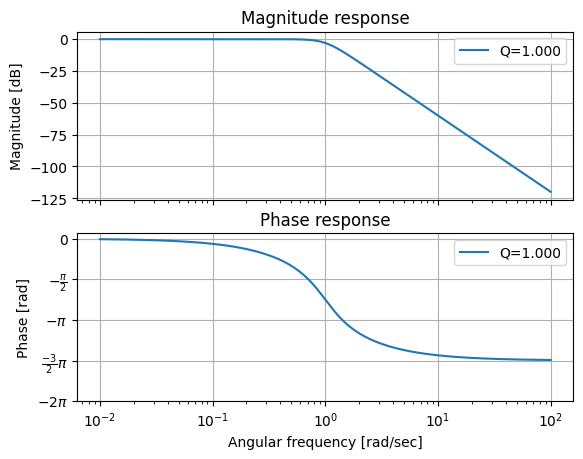

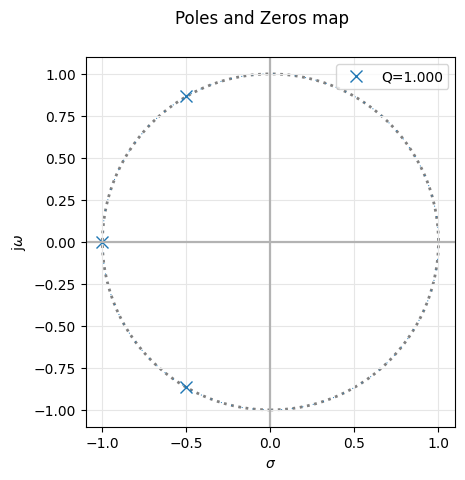

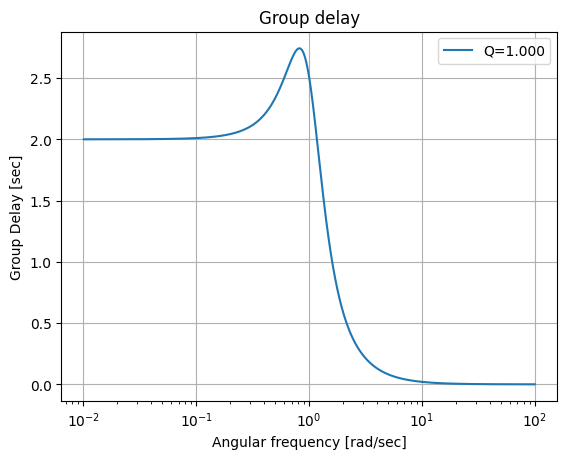

In [7]:
# Armado del filtro
Q = 1/(2*np.cos(np.pi/3))

z, p, k = sig.buttap(3)

Nlp, Dlp = sig.zpk2tf(z, p, k)
tflp = TransferFunction( Nlp, Dlp )

bodePlot(tflp, fig_id=1, filter_description = 'Q={:3.3f}'.format(Q) )
pzmap(tflp, fig_id=2, filter_description = 'Q={:3.3f}'.format(Q)) #S plane pole/zero plot
GroupDelay(tflp, fig_id=3, filter_description = 'Q={:3.3f}'.format(Q))

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

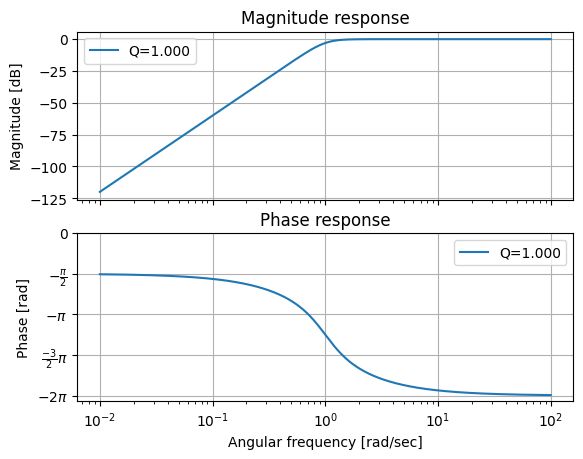

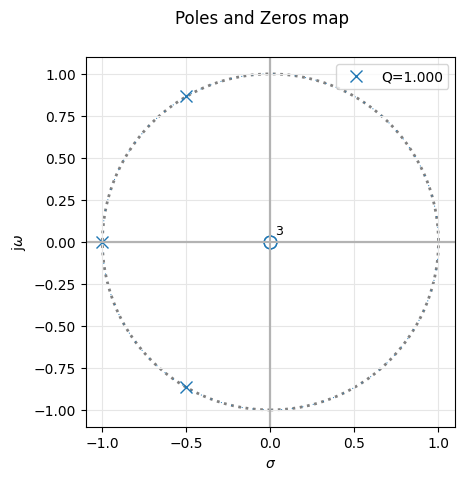

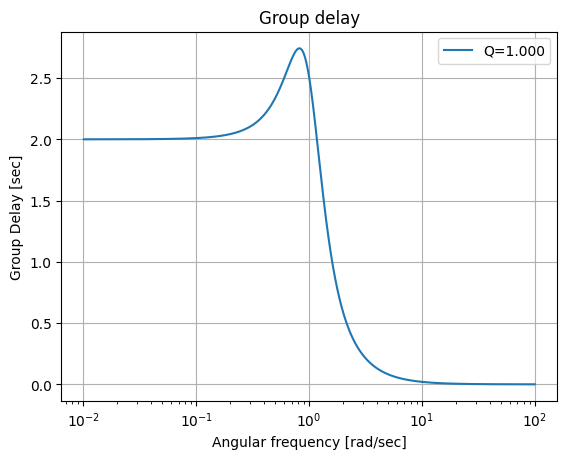

In [8]:
# Transformación al filtro pasa altos pedido
Nhp, Dhp = sig.lp2hp(Nlp , Dlp)

tfhp = TransferFunction(Nhp, Dhp)

bodePlot(tfhp, fig_id=1, filter_description = 'Q={:3.3f}'.format(Q) )
pzmap(tfhp, fig_id=2, filter_description = 'Q={:3.3f}'.format(Q)) #S plane pole/zero plot
GroupDelay(tfhp, fig_id=3, filter_description = 'Q={:3.3f}'.format(Q))                                                                         

Es interesante comparar los diagramas de polos y ceros del filtro objetivo y del filtro prototipo. Se observa claramente como los polos estan en el mismo lugar para ambos, uno en 0 y los otros dos complejos conjugados en el mismo radio pero con una separación de $\frac{\pi}{3}$, sin embargo en el pasa altos se encuentran los 3 ceros en el origen generados al aplicar el núcleo de transformación.

### Desnormalización de los componentes para obtener los requisitos pedidos

A continuación se realiza la desnormalización de los componentes del circuito para comprobar que el filtro cumpla con la plantilla pedida en un principio. Como no se indicaba ninguna especificación de componente decidí desnormalizar utilizando resistencia de valor $R=1k\Omega$. La simulación en Spice arrojó el siguiente resultado:

<img src="./Fotos/Pasivo_des_esq.png"/>
<img src="./Fotos/Pasivo_des_out.png"/>

Aqui se observá como claramente cumplimos a la perfeccion con las especificaciones de la plantilla a 40kHz se obtiene una atenuación de 1dB y luego a 10kHz se obtiene una atenuación MAYOR a los 30dB requeridos por la plantilla.


### Implementación del circuito utilizando el GIC de Antoniou

Se desea activar el circuito reemplazando al inductor del circuito por una estructura activa con OPAMPS que emule la misma impedancia. En este caso es posible realizarlo con un GIC de Antoniou ya que el inductor se encuentra aterrizado a tierra. A continuación se muestra el circuito normalizado y luego aplicando las normas de impedancias y de frecuencia para observar que se siga cumpliendo la plantilla.

<img src="./Fotos/GIC_esq.png"/>
<img src="./Fotos/GIC_out.png"/>
<img src="./Fotos/GIC_des_esq.png"/>
<img src="./Fotos/GIC_des_out.png"/>


Se observa como la transferencia pbtenida es exactamente igual pero en este caso nos sacamos el inductor de encima permitiendo generar el filtro en un simple chip de silicio.

## Conclusiones

De este trabajo se pudo comprobar la facilidad que presenta realizar filtros de distintas características a partir de diseñarlos como un simple pasabajos y luego aplicar la transformación la cual para el caso del pasalatos es muy sencilla. Otra vez se comprobó como el trabajar los filtros de máxima planicidad como butterworth modificando la norma de frecuencia presenta gran facilidad a la hora de resolver cálculos y se llega al mismo objetivo de manera mas sencilla.